# Import & Install Required Packages

In [1]:
import os
import itertools
import time

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
import matplotlib.pyplot as plt

import plotly.graph_objs as go

In [4]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.datasets import mnist
from keras.utils import to_categorical
from plotly import tools, subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Load dataset

In [5]:
%pip install opencv-python
import cv2

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Load CSV file
dataset_path = "E:/Lian/S2/Datasets/kannada_characters/"
# df = pd.read_csv(dataset_path+"kannada.csv", nrows=10)
df = pd.read_csv(dataset_path+"kannada.csv", nrows=100)
# df = pd.read_csv(dataset_path+"kannada.csv", nrows=10000)

# Prepare image paths and labels
image_paths = df['img'].values
labels = df['class'].values

Initial_X_data = []
Initial_Y_data = []

# image_size_width = 600
# image_size_height = 450
# Adjust the input size to be larger if possible
image_size_width, image_size_height = 64, 128
# image_size_height, image_size_width = 28, 28

for img_path, label in zip(image_paths, labels):
    img = cv2.imread(os.path.join(dataset_path, img_path), cv2.IMREAD_GRAYSCALE)
    # img = image_resize(img, height = image_size_height, width=image_size_width)
    img = cv2.resize(img, (image_size_height, image_size_width))

    Initial_X_data.append(img)
    Initial_Y_data.append(label)

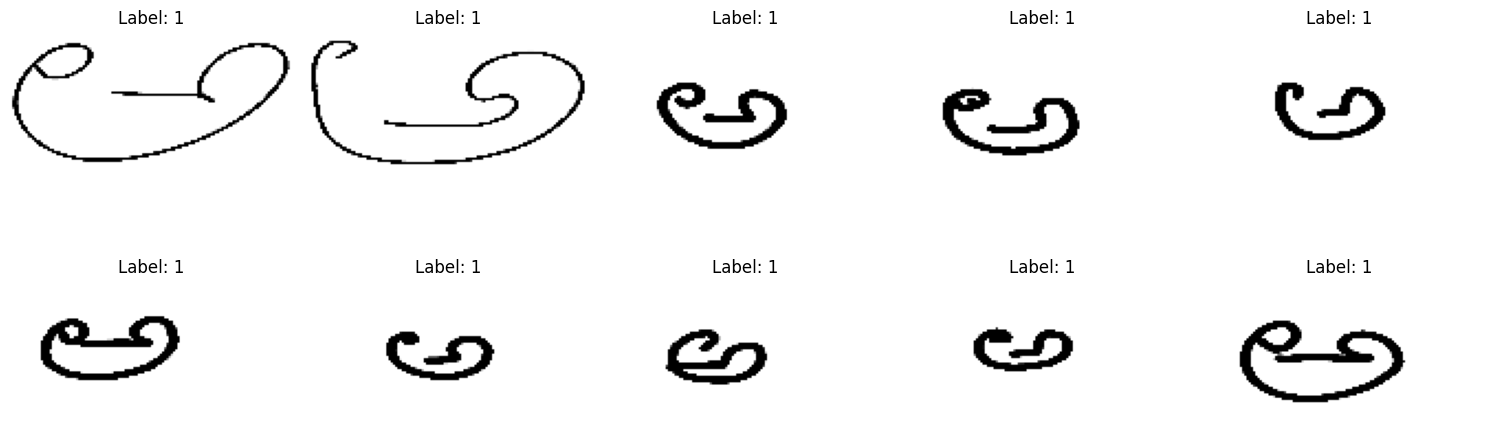

In [8]:
import math
num_images = 10
cols = 5  # Number of columns
rows = math.ceil(num_images / cols)  # Calculate number of rows

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))  # Adjust size based on rows

# Iterate over the images and axes to plot each image
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(Initial_X_data[i], cmap='gray')  # Display the image
        ax.set_title(f'Label: {Initial_Y_data[i]}')  # Set the title
    ax.axis('off')  # Hide the axis

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
# Convert to numpy arrays and normalize pixel values
X_data = np.array(Initial_X_data).astype('float32') / 255
Y_data = np.array(Initial_Y_data)

# Number of classes (adjust based on your specific case)
num_classes = len(np.unique(Y_data))
print(">>>>>>>>>.awlawko")
print(num_classes)

# Convert to one-hot encoding
Y_categorical = np.eye(num_classes)[Y_data - 1]

print(Y_categorical[0])

print(X_data[0])

>>>>>>>>>.awlawko
4
[1. 0. 0. 0.]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [10]:
# Reshape images to fit model input
X_data_reshaped = X_data.reshape(-1, image_size_width, image_size_height, 1)
X_data_reshaped

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [11]:

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_categorical, test_size=0.1, random_state=42)

print(f"X Training data shape: {X_train.shape}")
print(f"Y Training data shape: {Y_train.shape}")
print(f"X Test data shape: {X_test.shape}")
print(f"Y Test data shape: {Y_test.shape}")

X Training data shape: (90, 64, 128)
Y Training data shape: (90, 4)
X Test data shape: (10, 64, 128)
Y Test data shape: (10, 4)


In [12]:
# X_train = np.expand_dims(X_train, axis=-1) / 255.0
# X_test = np.expand_dims(X_test, axis=-1) / 255.0

# Define the CNN model

In [13]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # First Convolutional + MaxPooling block
    layers.Conv1D(filters=128, kernel_size=3, strides=1, activation='relu', input_shape=(image_size_width, image_size_height)),
    layers.MaxPooling1D(pool_size=2, strides=2),

    # Second Convolutional + MaxPooling block
    layers.Conv1D(filters=128, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2, strides=2),

    # Third Convolutional block
    layers.Conv1D(filters=128, kernel_size=3, strides=1, activation='relu'),

    # Fourth Convolutional block
    layers.Conv1D(filters=128, kernel_size=3, strides=1, activation='relu'),

    # Flatten + Dense layer
    layers.Flatten(),
    layers.Dense(512, activation='relu'),

    # Output Softmax layer (assuming you have `num_classes` for output neurons)
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 62, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 128)           49280     
                                                                 
 conv1d_3 (Conv1D)           (None, 10, 128)           4

# Compile and training the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# training the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)
# history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 2s 267ms/step - loss: 1.5414 - accuracy: 0.2778 - val_loss: 1.5841 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 0s 58ms/step - loss: 1.4492 - accuracy: 0.2889 - val_loss: 1.3613 - val_accuracy: 0.3000
Epoch 3/10
3/3 [==============================] - 0s 61ms/step - loss: 1.3487 - accuracy: 0.4444 - val_loss: 1.3416 - val_accuracy: 0.4000
Epoch 4/10
3/3 [==============================] - 0s 62ms/step - loss: 1.3000 - accuracy: 0.4778 - val_loss: 1.3839 - val_accuracy: 0.4000
Epoch 5/10
3/3 [==============================] - 0s 61ms/step - loss: 1.2080 - accuracy: 0.4667 - val_loss: 1.3099 - val_accuracy: 0.4000
Epoch 6/10
3/3 [==============================] - 0s 60ms/step - loss: 1.1961 - accuracy: 0.4667 - val_loss: 1.2680 - val_accuracy: 0.3000
Epoch 7/10
3/3 [==============================] - 0s 59ms/step - loss: 1.0494 - accuracy: 0.5333 - val_loss: 1.1677 - val_accuracy: 0.4000
Epoch 8/10
3/3 [==========

# Result

# Visualization

In [16]:
def plot_images_sample(X, Y):

    plt.figure(figsize=(10,10))

    rand_indicies = np.random.randint(len(X), size=25)

    for i in range(25):

        plt.subplot(5,5,i+1)

        plt.xticks([])

        plt.yticks([])

        plt.grid(False)

        index = rand_indicies[i]

        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)

        # The CIFAR labels happen to be arrays,

        # which is why you need the extra index

        plt.xlabel(Y[index])

    plt.show()


# plot_images_sample(mnist_data, mnist_label)

# Draw plot for CNN training

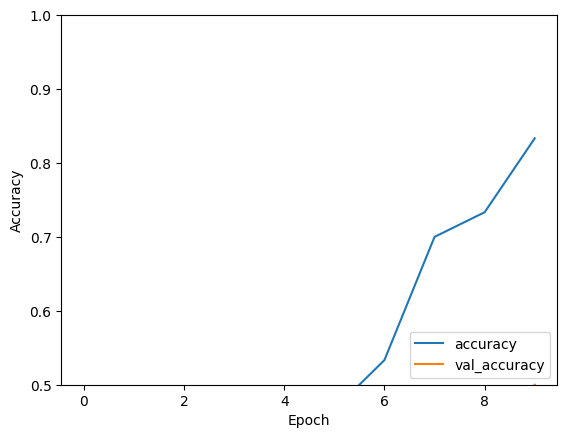

In [17]:
# Draw plot for CNN training

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0.5, 1])

plt.legend(loc='lower right')

plt.show()

In [18]:
# Evaluate the model on the test data

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test accuracy: {test_acc}")

1/1 [==============================] - 0s 33ms/step - loss: 1.1059 - accuracy: 0.5000
Test accuracy: 0.5


# Prediction

1/1 [==============================] - 0s 238ms/step


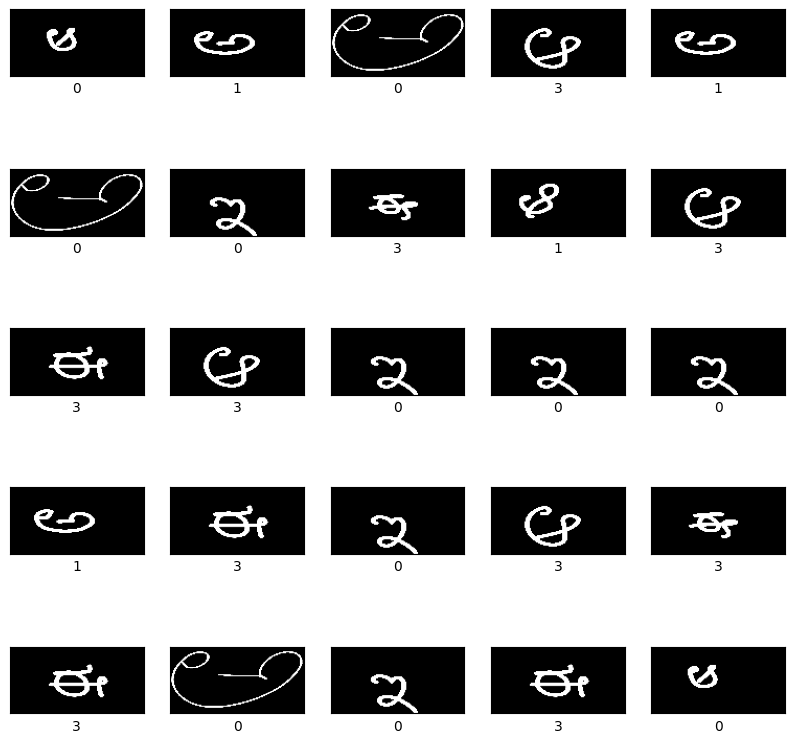

In [19]:
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis=1)

plot_images_sample(X_test, predictions)

# Wrong test

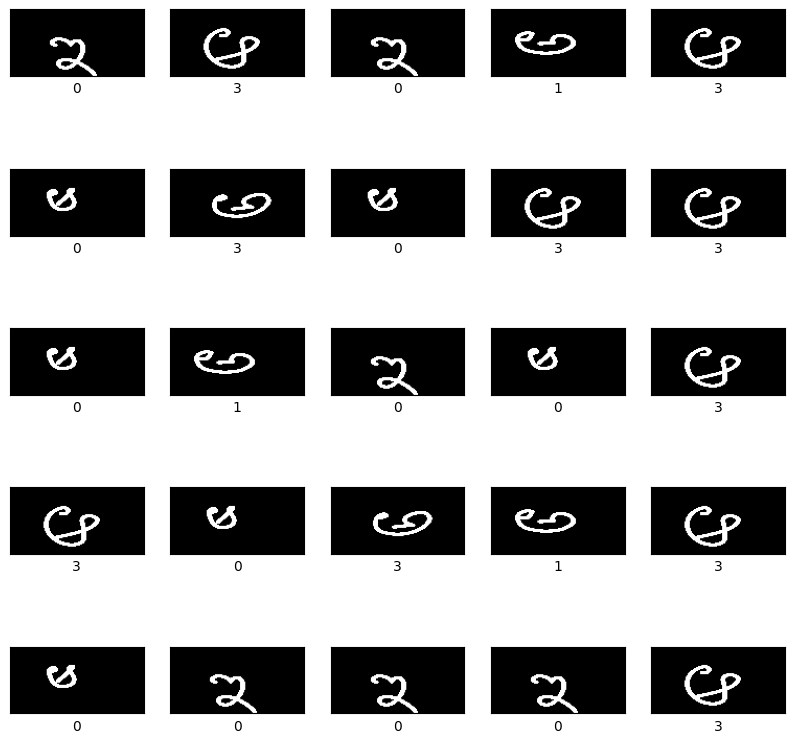

In [20]:
X_test_wrong = []

predictions_wrong = []

for i in range(len(X_test)):

    if predictions[i] != np.argmax(Y_test[i]):

        X_test_wrong.append(X_test[i])

        predictions_wrong.append(predictions[i])


plot_images_sample(X_test_wrong, predictions_wrong)

# Save the model to a file

In [21]:
# model_save_path = 'cnn_model.h5'

model_save_path = 'kannada_model_1.keras'

model.save(model_save_path)


# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 10078.77 KB


In [22]:
! pip install -q tensorflow-model-optimization
import tensorflow_model_optimization as tfmot  # TensorFlow Model Optimization toolkit

# Define the model and apply the sparsity API

In [23]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

pruning_params = {

      # 'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.5, begin_step=0, frequency=100)

      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)

  }



callbacks = [

  tfmot.sparsity.keras.UpdatePruningStep()

]



pruned_model = prune_low_magnitude(model, **pruning_params)



# Use smaller learning rate for fine-tuning

# opt = keras.optimizers.Adam(learning_rate=1e-5)
opt = keras.optimizers.Adam()


pruned_model.compile(

  # loss=keras.losses.CategoricalCrossentropy(from_logits=True),
  loss=keras.losses.CategoricalCrossentropy(),
  optimizer=opt,

  metrics=['accuracy']

)



pruned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv1d   (None, 62, 128)          98434     
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_max_poo  (None, 31, 128)          1         
 ling1d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_conv1d_  (None, 29, 128)          98434     
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 14, 128)          1         
 ling1d_1 (PruneLowMagnitude                                     
 )                                                               
                                                        

# Pruning Process

In [24]:
pruned_model.fit(

  X_train,

  Y_train,

  epochs=10,

  validation_data=(X_test, Y_test),
  callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - 6s 305ms/step - loss: 2.7037 - accuracy: 0.4444 - val_loss: 1.4846 - val_accuracy: 0.3000
Epoch 2/10
3/3 [==============================] - 0s 64ms/step - loss: 1.0071 - accuracy: 0.4889 - val_loss: 1.2548 - val_accuracy: 0.2000
Epoch 3/10
3/3 [==============================] - 0s 60ms/step - loss: 1.0531 - accuracy: 0.5778 - val_loss: 1.1740 - val_accuracy: 0.4000
Epoch 4/10
3/3 [==============================] - 0s 57ms/step - loss: 0.9065 - accuracy: 0.6667 - val_loss: 1.1035 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 0s 60ms/step - loss: 0.6726 - accuracy: 0.8333 - val_loss: 1.0058 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 62ms/step - loss: 0.5817 - accuracy: 0.7667 - val_loss: 0.8890 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 71ms/step - loss: 0.5024 - accuracy: 0.8111 - val_loss: 0.8679 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==========

In [25]:
model_save_path = 'kannada_model_pruned_1.keras'

pruned_model.save(model_save_path)


# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size after pruning: {model_size / 1024:.2f} KB")

Model size after pruning: 13434.90 KB


In [26]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)

tflite_model = converter.convert()



# Save the TFLite model to a file

model_save_path = 'kannada_model_pruned_1.tflite'

with open(model_save_path, 'wb') as f:

    f.write(tflite_model)



model_size = os.path.getsize(model_save_path)

print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpgyqfjpnt\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpgyqfjpnt\assets


Model size after pruning + convert to tf lite: 3347.33 KB


# Post Training Quantization

In [32]:
# # Strip the pruning wrappers to finalize the pruned model
# final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# # Convert to TensorFlow Lite model with quantization
# converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# # Set quantization parameters
# converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# # Optionally, if you have representative data, you can enable full integer quantization:
# def representative_dataset():
#     # Increase the dataset size or use a larger sample if needed, X_test.take(1000) or the full dataset
#     for data in X_test.take(1000):  # Adjust this number as needed
#         yield [tf.dtypes.cast(data, tf.float32)]  # Keep data type as float32 for this case

# # Assign the representative dataset for integer quantization
# converter.representative_dataset = representative_dataset

# # Use float16 quantization (you can switch to int8 if needed)
# converter.target_spec.supported_types = [tf.float16]  
# # Uncomment this if you wish to try int8: 
# # converter.target_spec.supported_types = [tf.int8]

# # Convert the model
# quantized_tflite_model = converter.convert()

# # Save the quantized model to a file
# quantized_model = 'quantized_pruned_model_kannada_1.tflite'
# with open(quantized_model, 'wb') as f:
#     f.write(quantized_tflite_model)

# # Load and use the quantized TFLite model
# interpreter = tf.lite.Interpreter(model_path=quantized_model)
# interpreter.allocate_tensors()


# WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 4 of 4). These functions will not be directly callable after loading.
# INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpshoc9qdi\assets
# INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpshoc9qdi\assets
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# Cell In[32], line 34
#      32 # Load and use the quantized TFLite model
#      33 interpreter = tf.lite.Interpreter(model_path=quantized_model)
# ---> 34 interpreter.allocate_tensors()

# File ~\anaconda3\envs\digit-recognition\lib\site-packages\tensorflow\lite\python\interpreter.py:513, in Interpreter.allocate_tensors(self)
#     511 def allocate_tensors(self):
#     512   self._ensure_safe()
# --> 513   return self._interpreter.AllocateTensors()

# ValueError: vector too long


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpshoc9qdi\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpshoc9qdi\assets


ValueError: vector too long

In [33]:
final_model.compile(

  # loss=keras.losses.CategoricalCrossentropy(from_logits=True),
  loss=keras.losses.CategoricalCrossentropy(),

  optimizer=opt,

  metrics=['accuracy']

)

In [34]:
final_model.fit(

  X_train,

  Y_train,

  epochs=10,

  validation_data=(X_test, Y_test),
    
  callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - 1s 213ms/step - loss: 0.2961 - accuracy: 0.8778 - val_loss: 1.0744 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 53ms/step - loss: 0.2903 - accuracy: 0.8889 - val_loss: 1.3694 - val_accuracy: 0.6000
Epoch 3/10
3/3 [==============================] - 0s 47ms/step - loss: 0.1505 - accuracy: 0.9667 - val_loss: 0.8613 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 48ms/step - loss: 0.1356 - accuracy: 0.9889 - val_loss: 0.8589 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 48ms/step - loss: 0.0901 - accuracy: 1.0000 - val_loss: 1.0590 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 0s 50ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 1.3227 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 49ms/step - loss: 0.0456 - accuracy: 0.9889 - val_loss: 1.5118 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==========

In [35]:
model_size = os.path.getsize(quantized_model)

print(f"Model size after quantization: {model_size / 1024:.2f} KB")

Model size after quantization: 1678.96 KB


# Optimized Model with Knowledge Distillation

In [36]:
# Custom loss function for Knowledge Distillation
def distillation_loss(y_true, y_pred, teacher_logits, temperature=5.0, alpha=0.5):
    student_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    distillation_loss = tf.keras.losses.KLDivergence()(
        tf.nn.softmax(teacher_logits / temperature),
        tf.nn.softmax(y_pred / temperature)
    )
    return alpha * student_loss + (1 - alpha) * distillation_loss

# Train student model with teacher model's logits
def train_student_model(student_model, teacher_model, X_train, y_train):
    teacher_logits = teacher_model.predict(X_train)

    # Custom training loop
    start_kd_time = time.time()    
    for epoch in range(10):
        print(f"Epoch {epoch + 1}/10")
        epoch_loss = 0
        correct_predictions = 0
        total_predictions = 0
        
        for i in range(0, len(X_train), 32):
            X_batch = X_train[i:i+32]
            y_batch = y_train[i:i+32]
            with tf.GradientTape() as tape:
                y_pred = student_model(X_batch, training=True)
                loss = distillation_loss(y_batch, y_pred, teacher_logits[i:i+32])
            grads = tape.gradient(loss, student_model.trainable_variables)
            student_model.optimizer.apply_gradients(zip(grads, student_model.trainable_variables))

            # Track loss and accuracy
            epoch_loss += loss.numpy().sum() * len(y_batch)  # Ensure loss is a scalar
            correct_predictions += np.sum(np.argmax(y_pred.numpy(), axis=-1) == np.argmax(y_batch, axis=-1))
            total_predictions += len(y_batch)

        average_loss = epoch_loss / total_predictions
        accuracy = correct_predictions / total_predictions
        print(f"Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

    end_time = time.time()
    total_time = end_time - start_kd_time 
    print(f"Total time: {total_time:.2f} seconds")

# Train the student model
student_model = model
train_student_model(model, final_model, X_train, Y_train)

3/3 [==============================] - 0s 14ms/step
Epoch 1/10
Loss: 23.2290, Accuracy: 0.8000
Epoch 2/10
Loss: 8.6916, Accuracy: 0.8000
Epoch 3/10
Loss: 7.3803, Accuracy: 0.8667
Epoch 4/10
Loss: 6.9719, Accuracy: 0.9000
Epoch 5/10
Loss: 5.8256, Accuracy: 0.9222
Epoch 6/10
Loss: 4.1831, Accuracy: 0.9333
Epoch 7/10
Loss: 1.6618, Accuracy: 1.0000
Epoch 8/10
Loss: 0.8824, Accuracy: 1.0000
Epoch 9/10
Loss: 0.4432, Accuracy: 1.0000
Epoch 10/10
Loss: 0.2478, Accuracy: 1.0000
Total time: 1.99 seconds


In [37]:
# Evaluate student model

student_loss, student_accuracy = student_model.evaluate(X_test, Y_test)
print(f"Student Model Accuracy: {student_accuracy}, Loss: {student_loss}")

1/1 [==============================] - 0s 21ms/step - loss: 1.4112 - accuracy: 0.6000
Student Model Accuracy: 0.6000000238418579, Loss: 1.4112399816513062


In [38]:
model_save_path = 'student_model_1_kannada.keras'
student_model.save(model_save_path)


# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 10078.77 KB
